# The Basal Ganglia Structure & Analysis of the Marmoset 

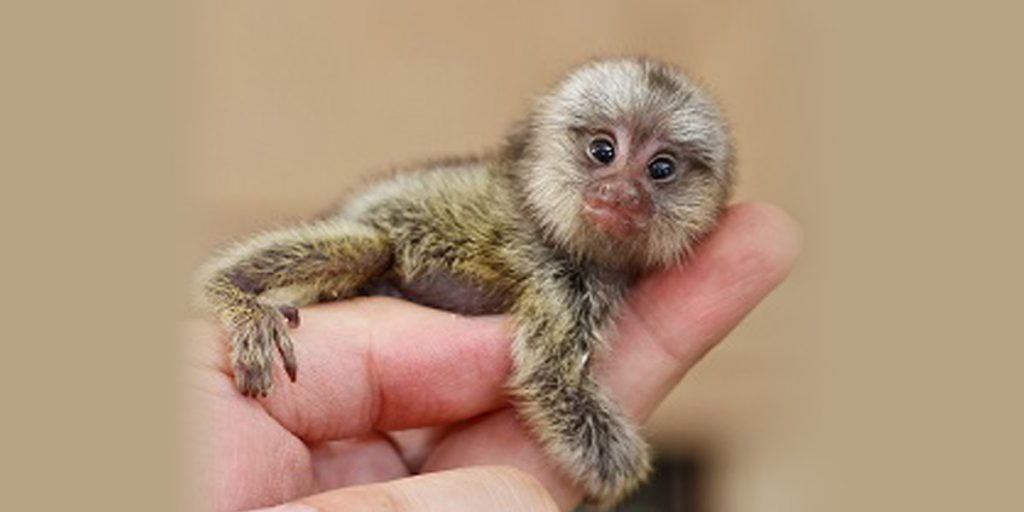

In [2]:
# Install the necessary packages 
!pip install scanpy anndata matplotlib seaborn pandas scipy scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import os
import scanpy as sc   # This package is used for the visualisation of the large datasets of single cell transcriptomics https://scanpy.readthedocs.io/en/stable/
import anndata as ad
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# The EDA is plot-heavy, and we set the plotting parameters as follows:

%matplotlib inline 
sc.settings.verbosity = 4
sc.set_figure_params(dpi=120, figsize=(6,6))

# Data as Cell-by-Gene matrix 

In [4]:
# load the datasets which were previously uploaded locally from the AWS 

data_path = os.path.expanduser("~/allen_HMBA_BG/Marmoset")
os.listdir(data_path)


['slab_plane_coordinates.csv',
 'mmc_results.csv',
 'specimen_metadata.csv',
 'cell_supplemental_metadata.csv',
 'marmoset_DEA.ipynb',
 'Xenium-CJ23.56.004-BG-log2.h5ad',
 'cell_metadata.csv',
 'visualization.csv',
 'gene.csv',
 'donor.csv',
 'value_sets.csv',
 '.ipynb_checkpoints',
 'views',
 'Untitled1.ipynb',
 'cell_to_cluster_membership.csv',
 'Untitled.ipynb',
 'cell_anatomical_annotations.csv',
 'Organic Chemsitry ',
 'Xenium-CJ23.56.004-BG-raw.h5ad']

# Transcriptomics Data 

In [5]:
# The transcriptomics data are stored in the format of h5ad in two scales, one is raw, and the other is transformed in log2! 
# For the normalisation purposes of the task, I will use the one which is transformed into log2 

adata = sc.read_h5ad(os.path.join(data_path, "Xenium-CJ23.56.004-BG-log2.h5ad"))
adata_raw = sc.read_h5ad(os.path.join(data_path, "Xenium-CJ23.56.004-BG-raw.h5ad"))


In [6]:
adata  # n_obs represents the number of the cells in the basal ganglia 

AnnData object with n_obs × n_vars = 1355089 × 300
    obs: 'brain_section_label', 'brain_section_barcode'
    var: 'gene_symbol'

In [7]:
adata.obs.head()

,brain_section_label,brain_section_barcode
cell_label,,
1382042951_abmkfncc-1-20250227,CJ23.56.004.CX.42.01.06,1382042951
1382042951_abmmdgea-1-20250227,CJ23.56.004.CX.42.01.06,1382042951
1382042951_abmojfce-1-20250227,CJ23.56.004.CX.42.01.06,1382042951
1382042951_abmomnim-1-20250227,CJ23.56.004.CX.42.01.06,1382042951
1382042951_aeiamgga-1-20250227,CJ23.56.004.CX.42.01.06,1382042951


In [8]:
adata.var.head()

,gene_symbol
gene_identifier,
NCBIGene:100393956,ABI3BP
NCBIGene:100388523,ABL2
NCBIGene:100389219,ABLIM1
NCBIGene:100400228,ACAP2
NCBIGene:100392257,ACHE


In [9]:
print("obsm keys:", adata.obsm.keys())   # spatial coordinates often in adata.obsm['spatial'] or adata.obs columns

obsm keys: KeysView(AxisArrays with keys: )


# The verification of the reads 


The transcriptomics data in the AnnData structure are located in X 

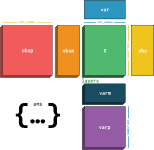

https://raw.githubusercontent.com/scverse/anndata/main/docs/_static/img/anndata_schema.svg


| Component  | Type             | Along Which Axis? | Contains                  |
| ---------- | ---------------- | ----------------- | ------------------------- |
| **X**      | matrix           | cells × genes     | expression values         |
| **obs**    | DataFrame        | cells             | cell metadata             |
| **var**    | DataFrame        | genes             | gene metadata             |
| **layers** | dict of matrices | cells × genes     | alternative versions of X |
| **obsm**   | dict of matrices | cells             | embeddings (PCA, UMAP)    |
| **varm**   | dict of matrices | genes             | gene loadings             |
| **uns**    | dict             | none              | unstructured data         |
| **raw**    | AnnData object   | cells × genes     | saved raw expression      |


In [10]:
print("X shape:", adata.X.shape)  # The shape represents the number of cell X number of the genes
print("X type:", type(adata.X))
print("X dtype:", adata.X.dtype)


X shape: (1355089, 300)
X type: <class 'scipy.sparse._csr.csr_matrix'>
X dtype: float32


In [11]:
adata.X[:5, :5]


<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 8 stored elements and shape (5, 5)>

In [12]:
# Check the minimum and maximum values in the .X matrix
min_val = np.min(adata.X)
max_val = np.max(adata.X)

print(f"Minimum value in adata.X: {min_val}")
print(f"Maximum value in adata.X: {max_val}")

Minimum value in adata.X: 0.0
Maximum value in adata.X: 9.967226028442383


In [13]:
adata.obs.isna().sum()    # This is for the verification of the presenc eof the missing data 


brain_section_label      0
brain_section_barcode    0
dtype: int64

In [14]:
adata.obs.head()          # show first rows
adata.obs.columns         # list of metadata fields
adata.obs.dtypes


brain_section_label      category
brain_section_barcode       int64
dtype: object

In [15]:
adata.var.head() # This gives the list of the genes that exist and their transcripts 


,gene_symbol
gene_identifier,
NCBIGene:100393956,ABI3BP
NCBIGene:100388523,ABL2
NCBIGene:100389219,ABLIM1
NCBIGene:100400228,ACAP2
NCBIGene:100392257,ACHE


In [16]:
adata.obs_names # This command gives the cell names 

Index(['1382042951_abmkfncc-1-20250227', '1382042951_abmmdgea-1-20250227',
       '1382042951_abmojfce-1-20250227', '1382042951_abmomnim-1-20250227',
       '1382042951_aeiamgga-1-20250227', '1382042951_aeibkcmo-1-20250227',
       '1382042951_aekepgbm-1-20250227', '1382042951_aekgafco-1-20250227',
       '1382042951_aekjibba-1-20250227', '1382042951_aekjlbea-1-20250227',
       ...
       '1388175626_oflpkahn-1-20250227', '1388175626_oflpljjb-1-20250227',
       '1388175626_oflpogfa-1-20250227', '1388175626_ofmabkpn-1-20250227',
       '1388175626_ofmagnko-1-20250227', '1388175626_ofmajeif-1-20250227',
       '1388175626_ofmajfio-1-20250227', '1388175626_ofmbegon-1-20250227',
       '1388175626_ofmbfjag-1-20250227', '1388175626_ofmbiima-1-20250227'],
      dtype='object', name='cell_label', length=1355089)

In [17]:
expr_preview = pd.DataFrame(
    adata.X[:5, :5].toarray(),
    index=adata.obs_names[:5],
    columns=adata.var_names[:5]
)

In [18]:
expr_preview  # This is preview of the expression of the genes 

gene_identifier,NCBIGene:100393956,NCBIGene:100388523,NCBIGene:100389219,NCBIGene:100400228,NCBIGene:100392257
cell_label,,,,,
1382042951_abmkfncc-1-20250227,0.0,0.000000,0.000000,1.935406,0.000000
1382042951_abmmdgea-1-20250227,0.0,0.000000,2.627921,4.441310,0.000000
1382042951_abmojfce-1-20250227,0.0,0.000000,0.000000,4.334091,0.000000
1382042951_abmomnim-1-20250227,0.0,0.000000,0.000000,2.850235,0.000000
1382042951_aeiamgga-1-20250227,0.0,1.412039,0.000000,2.111785,1.412039


# Metadata and spatial coordinates 

In [19]:
meta = pd.read_csv(os.path.join(data_path, "cell_metadata.csv"), low_memory=False)

In [20]:
meta.columns[:50]

Index(['cell_label', 'brain_section_label', 'brain_section_barcode',
       'segmentation_job_id', 'x_experiment', 'y_experiment', 'qc_pass',
       'dataset_label', 'feature_matrix_label', 'abc_sample_id'],
      dtype='object')

In [21]:
adata.obs.columns
meta.columns
meta.head()


,cell_label,brain_section_label,brain_section_barcode,segmentation_job_id,x_experiment,y_experiment,qc_pass,dataset_label,feature_matrix_label,abc_sample_id
0,1382042951_abmkfncc-1-20250227,CJ23.56.004.CX.42.01.06,1382042951,xenium_cell_segmentation_kit_v1,5923.492676,6160.654297,True,HMBA-Xenium-CJ23.56.004-BG,Xenium-CJ23.56.004-BG,c8c08d8c-5147-4d03-b6f4-ca7bf4d0b8d1
1,1382042951_abmmdgea-1-20250227,CJ23.56.004.CX.42.01.06,1382042951,xenium_cell_segmentation_kit_v1,6137.572266,6217.075684,True,HMBA-Xenium-CJ23.56.004-BG,Xenium-CJ23.56.004-BG,f10bad2c-9cc7-44bf-bd7e-4e61d28121bd
2,1382042951_abmojfce-1-20250227,CJ23.56.004.CX.42.01.06,1382042951,xenium_cell_segmentation_kit_v1,5802.674805,5614.007812,True,HMBA-Xenium-CJ23.56.004-BG,Xenium-CJ23.56.004-BG,080466ff-3dea-44f1-b6e2-7892e8c12c95
3,1382042951_abmomnim-1-20250227,CJ23.56.004.CX.42.01.06,1382042951,xenium_cell_segmentation_kit_v1,5805.942383,5599.325684,True,HMBA-Xenium-CJ23.56.004-BG,Xenium-CJ23.56.004-BG,cee3bf8b-a159-42d1-983a-ac149b9edda9
4,1382042951_aeiamgga-1-20250227,CJ23.56.004.CX.42.01.06,1382042951,xenium_cell_segmentation_kit_v1,6291.268066,6068.720215,True,HMBA-Xenium-CJ23.56.004-BG,Xenium-CJ23.56.004-BG,3f24c46e-9ab1-4a54-a6fc-591f752edb48


# To confirm of the spatial coordinates have been added properly to the adata

In [22]:
adata.obsm.keys()


KeysView(AxisArrays with keys: )

In [23]:
adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)
adata.obs["n_counts"] = adata.X.sum(axis=1)


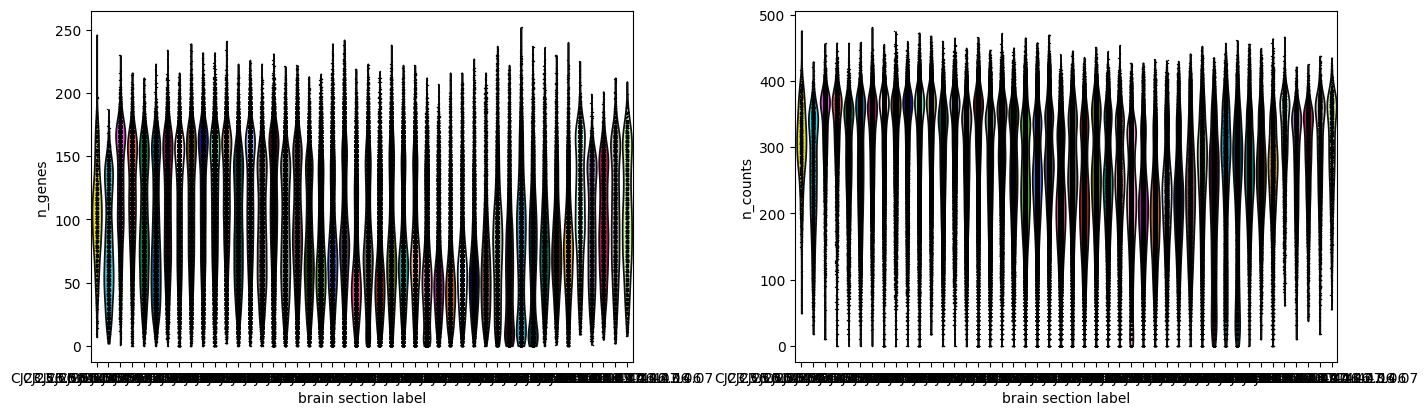

In [24]:
sc.pl.violin(adata, ["n_genes", "n_counts"], groupby="brain_section_label")



# Explore the "Consensus Taxonomy"


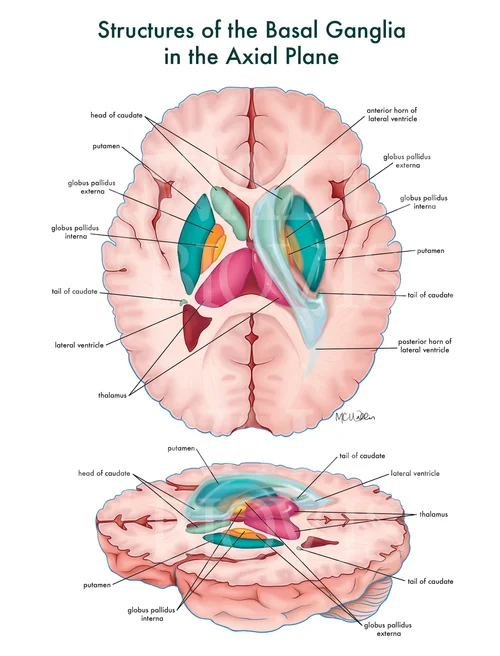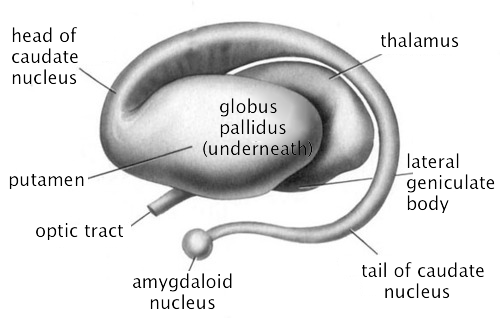![image.png]

https://images.squarespace-cdn.com/content/v1/5c832c2b90f9044a298a7a4e/1554408077187-ZW30ZOYTRTAT81V4CNSE/basal-ganglia-color.jpg?format=500w
https://webspace.ship.edu/cgboer/basalgangliagray.gif


# Feature Selection and Dimensionality Reduction

In [25]:
!pip install --user scikit-misc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.5/186.5 KB 3.3 MB/s eta 0:00:004.0 MB/s eta 0:00:01


In [26]:
!pip install scikit-misc

Defaulting to user installation because normal site-packages is not writeable


In [27]:
n_top = 2000
sc.pp.highly_variable_genes(adata, n_top_genes=n_top, flavor='cell_ranger')

In [28]:
if 'x_experiment' in adata.obs.columns and 'y_experiment' in adata.obs.columns:
    adata.obsm['spatial'] = adata.obs[['x_experiment','y_experiment']].to_numpy()
    print('Spatial coordinates added to adata.obsm["spatial"]')
else:
    print('No x_experiment/y_experiment columns found; check metadata files')


No x_experiment/y_experiment columns found; check metadata files


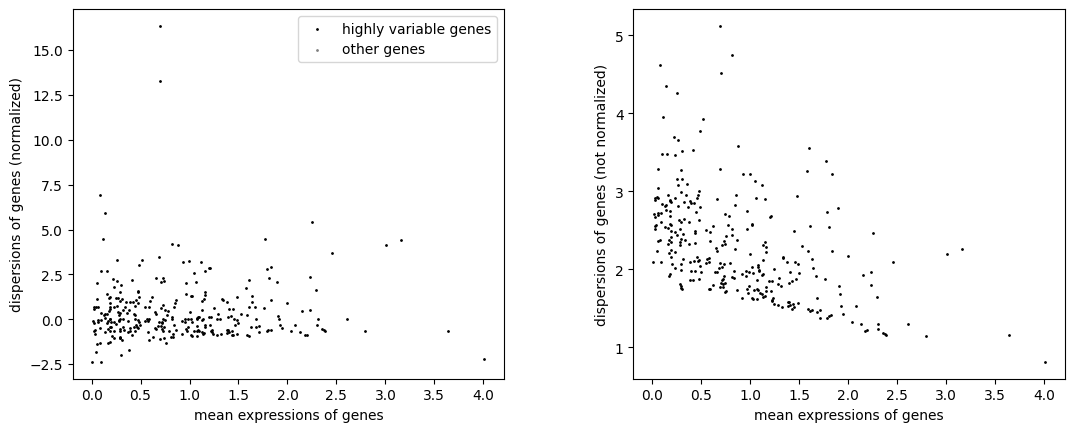

In [29]:
sc.pl.highly_variable_genes(adata)

In [30]:
# keep "Highly Variable Genes" for downstream application 

adata_hvg = adata[:, adata.var['highly_variable']].copy()
print('adata_hvg shape:', adata_hvg.shape)

adata_hvg shape: (1355089, 300)


# PCA, neighbors, UMAP

In [31]:
sc.pp.scale(adata_hvg, max_value=10)

In [32]:
#Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.

sc.tl.pca(adata_hvg, svd_solver='arpack')

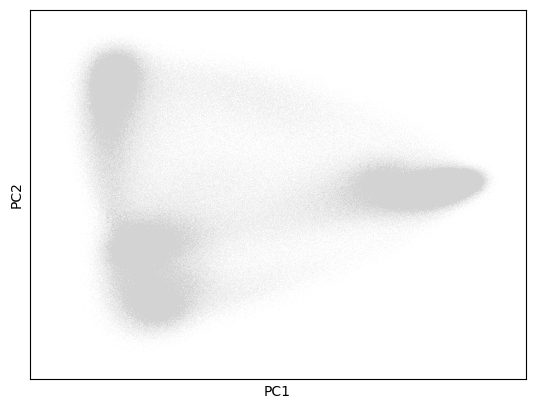

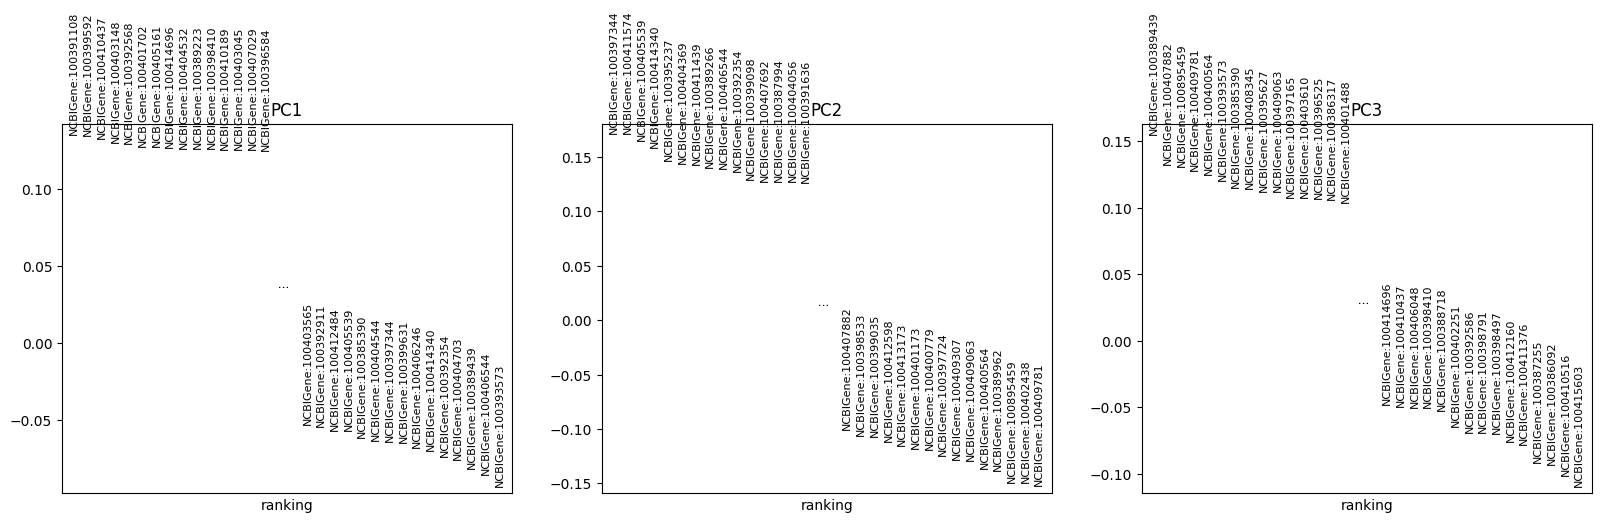

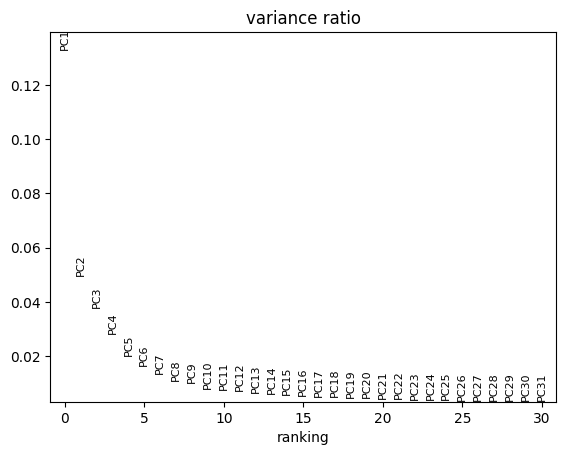

In [33]:
sc.pl.pca_overview(adata_hvg)


# Nearest neighbor graph construction and visualization

In [34]:
# compute the neighbourhood graph of cells using the PCA representation of the data matrix

#sc.pp.neighbors(adata_hvg, n_neighbors=5, n_pcs=5)

In [35]:
#sc.tl.umap(adata_hvg, min_dist=0.3)

In [36]:

adata.shape
print("Matrix type:", type(adata.X))
print("Memory size GB:", adata.X.nbytes / 1e9 if hasattr(adata.X, "nbytes") else "Sparse")


Matrix type: <class 'scipy.sparse._csr.csr_matrix'>
Memory size GB: Sparse


In [37]:
adata.shape


(1355089, 300)

# PCA + neighbors + UMAP on a subset only,

In [38]:
adata_small = sc.pp.subsample(adata, fraction=0.05, copy=True)

In [39]:
sc.tl.pca(adata_small)


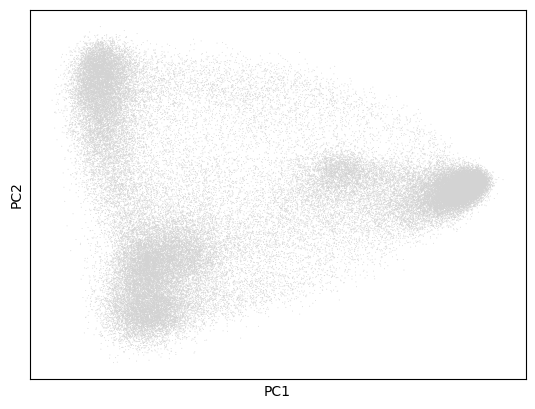

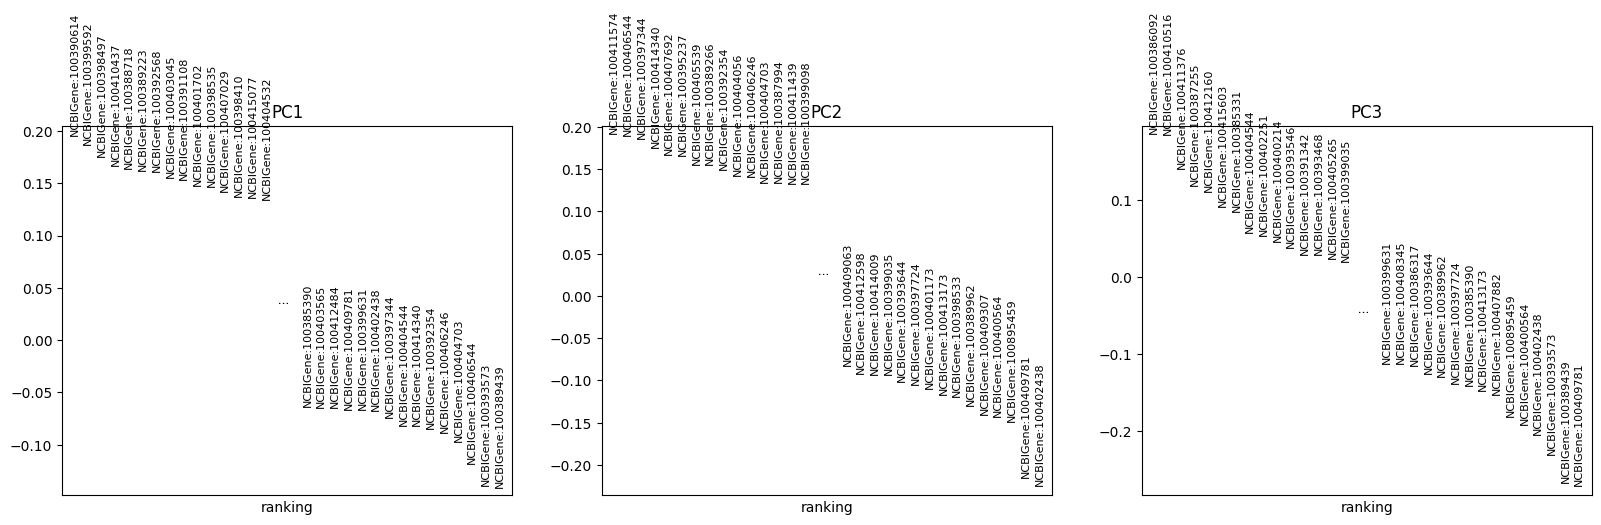

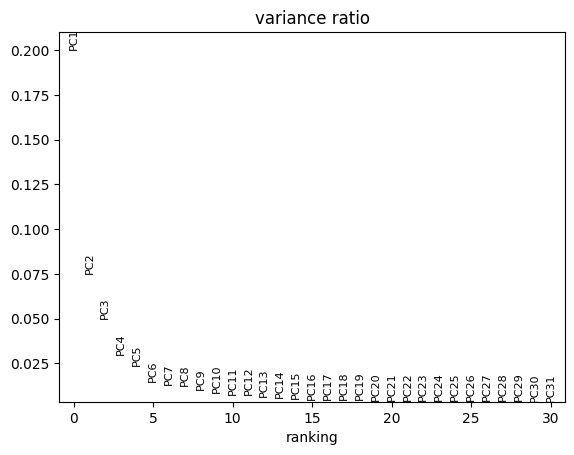

In [40]:
sc.pl.pca_overview(adata_small)

In [41]:
sc.pp.neighbors(adata_small)

2026-01-05 13:51:57.570690: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-05 13:51:57.878845: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-05 13:51:58.903850: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [42]:
sc.tl.umap(adata_small,min_dist=0.3)

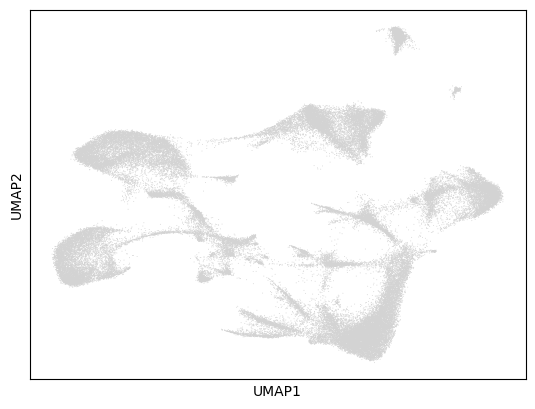

In [43]:
sc.pl.umap(adata_small)

# Clustering 

In [44]:
sc.tl.leiden(adata_small, resolution=0.6, key_added='leiden')

/tmp/ipykernel_3028371/704660434.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_small, resolution=0.6, key_added='leiden')


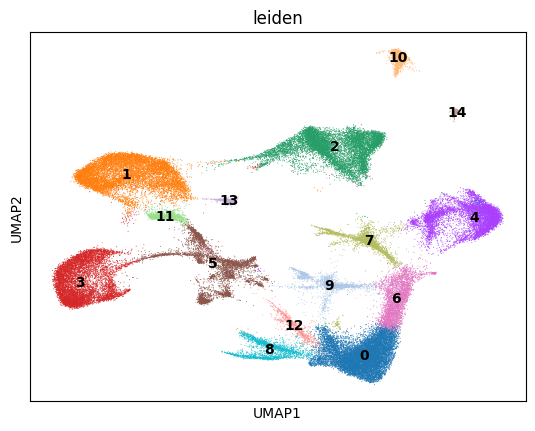

In [45]:
sc.pl.umap(adata_small, color=['leiden'], legend_loc='on data')